# Importing the Libraries and Files

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import lightgbm as lgbm
import sklearn
import seaborn as sns

In [ ]:
train = pd.read_csv('Housing_dataset_train.csv')
test = pd.read_csv('Housing_dataset_test.csv')

# Exploratory Data Analysis

In [ ]:
#preview the train column
train.head(10)

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
5,1733,Borno,Mansion,NaN,1.0,3.0,1341750.867
6,7892,Kwara,Bungalow,NaN,4.0,4.0,2125789.778
7,3003,Katsina,Penthouse,3.0,3.0,5.0,2043107.592
8,555,Osun,Semi-detached duplex,NaN,1.0,2.0,1219453.877
9,3085,Kaduna,Penthouse,NaN,3.0,3.0,2710664.872


In [ ]:
#review the dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [ ]:
#check the column names
train.columns

Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

In [ ]:
#check the test dataframe
test.head(10)

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1
5,9950,Edo,Detached duplex,6,4,5
6,1548,Niger,Flat,9,3,4
7,526,Anambra,Flat,1,1,4
8,6776,Niger,Flat,1,5,1
9,1851,Adamawa,Bungalow,4,1,4


In [ ]:
#check for null values
train.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

# Handling Missing Data

In [ ]:
#first check if there are instances where there are nulls in all feature columns

column_names = ['loc', 'title', 'bedroom', 'bathroom', 'parking_space']

#filtering train for row with all column values missing
empty_rows = train[train[column_names].isnull().sum(axis=1) == 5]

print(empty_rows)


Empty DataFrame
Columns: [ID, loc, title, bedroom, bathroom, parking_space, price]
Index: []


there are no rows where all the values are missing

In [ ]:
#check for rows where there are nulls in atleast 3 feature columns

column_names = ['loc', 'title', 'bedroom', 'bathroom', 'parking_space']

#filtering train for row with all column values missing
empty_rows_two = train[train[column_names].isnull().sum(axis=1) >= 3]

print(len(empty_rows_two))

59


we then proceed to filter out these rows from the train dataset

In [ ]:
# Merge the two DataFrames based on all columns
merged_df = train.merge(empty_rows_two, how='left', indicator=True)

# Drop the rows that are present in both DataFrames
train = merged_df[merged_df['_merge'] == 'left_only'].drop('_merge', axis=1)

Visualization on Missing Data and Statistical Test

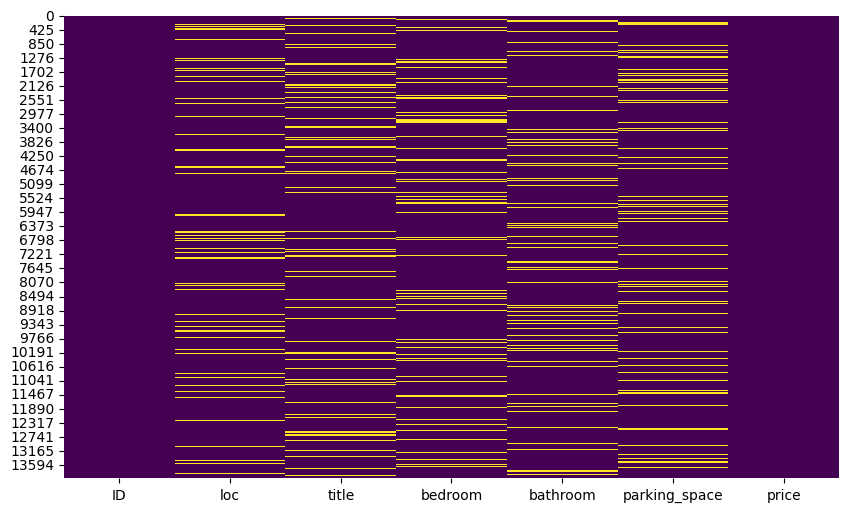

In [ ]:
#plot the missing values, with the yellow lines indicating missing values
plt.figure(figsize=(10, 6))
sns.heatmap(train.isnull(), cmap='viridis', cbar=False)
plt.show()

In [ ]:
#sum of all rows with missing values
print(train.isnull().any(axis=1).sum())

8252


are the missing data related or missing completely at random?

In [ ]:
#we perform a chi-square test to understand the relationship between missing data

#import chi2 from scipy
from scipy.stats import chi2_contingency

In [ ]:
# Convert train to a binary matrix with 1 for missing values and 0 for non-missing values
binary_matrix = train.isnull().astype(int)

# Add 0.01 to each cell to avoid an excessive number of 0 values skewing results
constant = 0.01
binary_matrix += constant

# Perform the Chi-square test (Little's MCAR test)
# If p-value is 1, missing values are MCAR, and there's no pattern to missingness.
chi2, p_value, _, _ = chi2_contingency(binary_matrix)

# Print Chi-square statistic and p-value. If p-value < 0.05, reject MCAR null hypothesis,
# indicating a pattern in missingness.
print("Chi-square:", chi2)

print("p-value:", p_value)


Chi-square: 32294.55788451337
p-value: 1.0


In this case, p-value is 1.0, failing to reject MCAR null hypothesis. Analysis is unbiased. then we can proceed to understanding our data better

# EDA Continued

In [ ]:
train.dtypes

ID                 int64
loc               object
title             object
bedroom          float64
bathroom         float64
parking_space    float64
price            float64
dtype: object

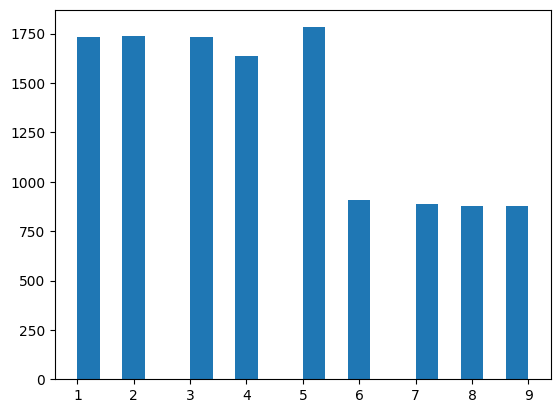

In [ ]:
plt.hist(data=train, x='bedroom', bins=20)
plt.show()

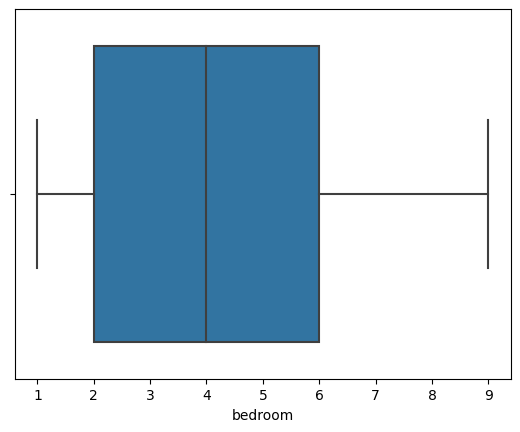

In [ ]:
sns.boxplot(data=train, x='bedroom')
plt.show()

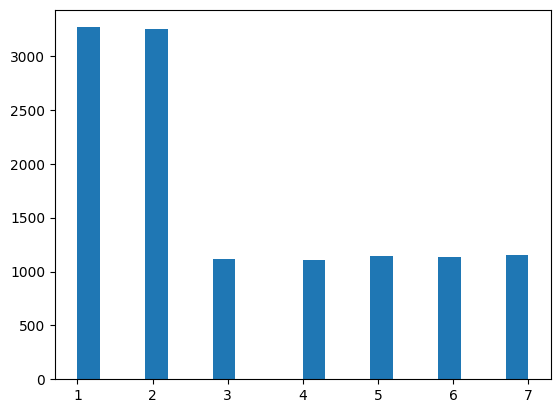

In [ ]:
plt.hist(data=train, x='bathroom', bins=20)
plt.show()

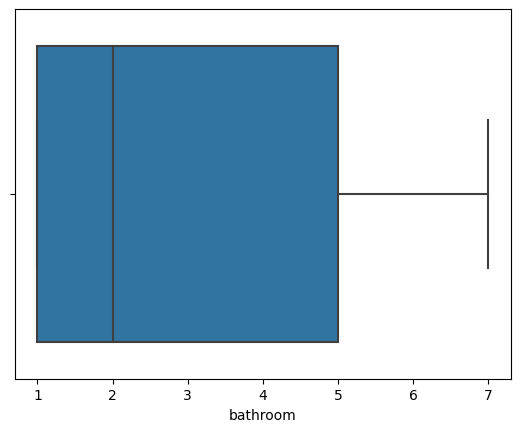

In [ ]:
sns.boxplot(data=train, x='bathroom')
plt.show()

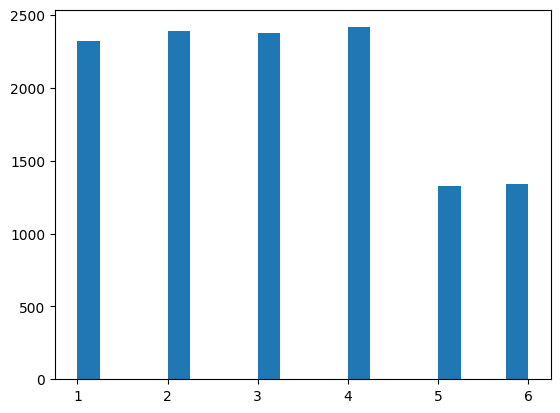

In [ ]:
plt.hist(data=train, x='parking_space', bins=20)
plt.show()

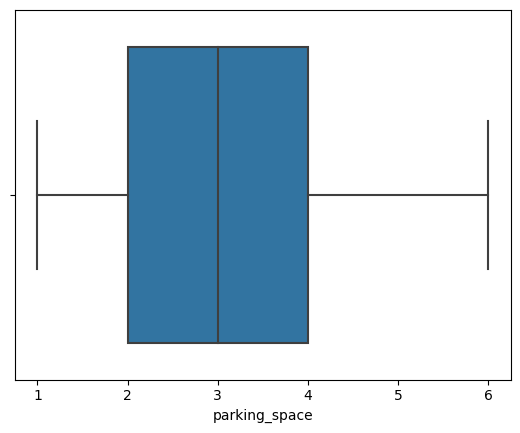

In [ ]:
sns.boxplot(data=train, x='parking_space')
plt.show()

visualizing the numerical columns showed a normal distribution of the data

we can then begin to understand how the categorical columns are shared across the target column

In [ ]:
#understanding the distribution of prices via title
train.groupby(by='title')['price'].mean().sort_values(ascending=False)

title
Mansion                 3.724331e+06
Penthouse               2.628103e+06
Detached duplex         2.207907e+06
Townhouse               2.055194e+06
Terrace duplex          1.927270e+06
Semi-detached duplex    1.918595e+06
Bungalow                1.732427e+06
Flat                    1.722613e+06
Apartment               1.567481e+06
Cottage                 1.307149e+06
Name: price, dtype: float64

mansions are more expensive(on average) than other types of houses

In [ ]:
#understanding the distribution of prices via loc
train.groupby(by='loc')['price'].mean().sort_values(ascending=False)

loc
Lagos          4.206297e+06
Bayelsa        3.112322e+06
Rivers         2.957098e+06
Akwa Ibom      2.719603e+06
Delta          2.707784e+06
Ogun           2.564020e+06
Cross River    2.507765e+06
Anambra        2.340069e+06
Edo            2.310452e+06
Oyo            2.295890e+06
Ondo           2.275987e+06
Enugu          2.270996e+06
Osun           2.180408e+06
Ekiti          2.109220e+06
Kano           2.081931e+06
Imo            2.067489e+06
Nasarawa       2.063916e+06
Katsina        1.947589e+06
Plateau        1.944207e+06
Benue          1.922663e+06
Kwara          1.903424e+06
Adamawa        1.903241e+06
Niger          1.876637e+06
Gombe          1.855487e+06
Taraba         1.855306e+06
Kaduna         1.846993e+06
Bauchi         1.772961e+06
Kogi           1.761205e+06
Yobe           1.749611e+06
Borno          1.736760e+06
Jigawa         1.735867e+06
Abia           1.717083e+06
Zamfara        1.689541e+06
Sokoto         1.681449e+06
Ebonyi         1.637198e+06
Kebbi          1

from the above, houses in Lagos are more expensive(on average) than other in other locations

In [ ]:
train['bedroom'].describe()

count    12168.000000
mean         4.308268
std          2.440694
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          9.000000
Name: bedroom, dtype: float64

In [ ]:
train['bedroom'].value_counts()

5.0    1782
2.0    1737
1.0    1732
3.0    1731
4.0    1638
6.0     907
7.0     887
9.0     879
8.0     875
Name: bedroom, dtype: int64

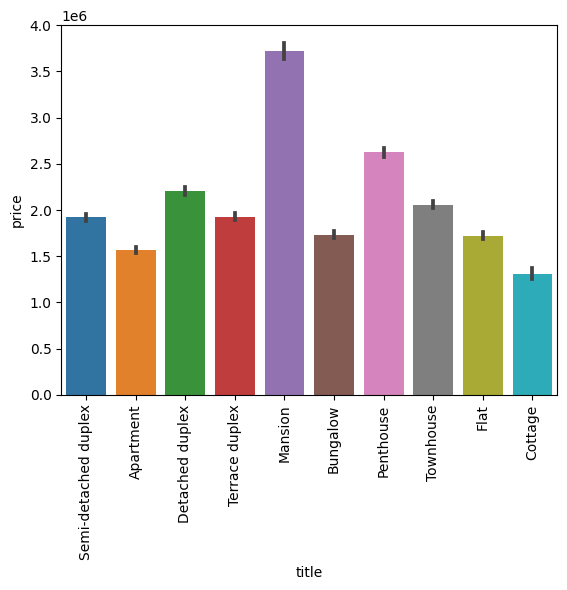

In [ ]:
#check out the distribution of price based on title
sns.barplot(data=train, x='title' , y='price')
plt.xticks(rotation=90)
plt.show()

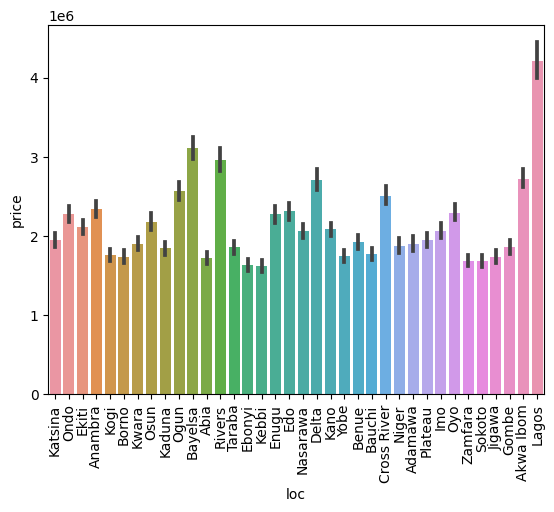

In [ ]:
#check out the distribution of price based on loc
sns.barplot(data=train, x='loc' , y='price')
plt.xticks(rotation=90)
plt.show()

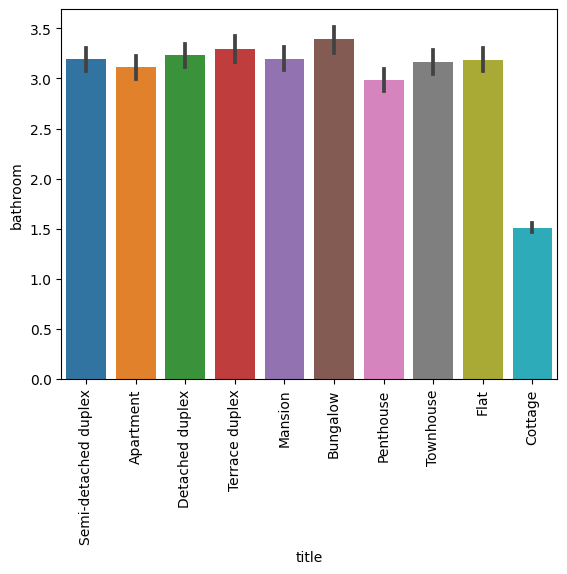

In [ ]:
#check out the distribution of bathroom based on title
sns.barplot(data=train, x='title' , y='bathroom')
plt.xticks(rotation=90)
plt.show()

## Collecting Exra Data

In [ ]:
properties=[]
check= {'Anambra': 'awka',
 'Ekiti': 'ado-ekiti',
 'Ondo':'akure',
 'Borno':'maiduguri',
 'Abia': 'umuahia',
 'Ogun':'abeokuta',
 'Rivers':'port-harcourt',
  'Kwara': 'ilorin',
 'Edo':'benin-city',
 'Niger':'minna',
 'Imo':'owerri',
 'Delta':'warri',
 'Yobe':'damaturu',
 'Osun':'osogbo',
 'Niger':'Minna',
 'Cross River':'calabar',
 'Plateau':'jos',
 'Zamfara':'gusau',
 'Adamawa':'mubi'
}
for i in train['loc'].unique():

    if i in check:
        j=check[i]
    else:
        j=i
    try:
        df=pd.read_html('https://livingcost.org/cost/nigeria/'+j.lower())[0]['One person'].to_list()
    except:
        df= [np.nan]*8
    df.append(i)
    properties.append(df)
state_info= pd.DataFrame(properties, columns=['Total with rent', 'Without rent', 'Rent & Utilities', 'Food', 'Transport','Monthly salary after tax','Quality of life','Population', 'loc'])
state_info.to_csv('states.csv', index= False)

## Machine learning Pre-processing

In [ ]:
train= pd.read_csv('Housing_dataset_train.csv')
test= pd.read_csv('Housing_dataset_test.csv')
ss= pd.read_csv('Sample_submission.csv')
states= pd.read_csv('states.csv')

In [ ]:
train=pd.merge(train, states, on='loc', how='left')
test=pd.merge(test, states, on='loc', how='left')

In [ ]:
train['rooms']=train['bedroom']+ train['bathroom']
test['rooms']=test['bedroom']+ test['bathroom']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder= OrdinalEncoder()
X= train.drop(['price'], axis=1)

X[['loc', 'title']]=encoder.fit_transform(X[['loc', 'title']])
test[['loc', 'title']]=encoder.transform(test[['loc', 'title']])
print(X)

In [ ]:
def clean(x):
    if type(x) != float:
        return float(x.replace('$', ''))
    else:
        return x
def populate(x):
    if type(x) != float:
        if 'M' in x:
            a= float(x.replace('M', ''))
        else:
            a= int(x.replace('K', ''))/1000
        return a
    else:
        return x

In [ ]:
X['Total with rent']= X['Total with rent'].apply(clean)
X['Without rent']= X['Without rent'].apply(clean)
X['Rent & Utilities']= X['Rent & Utilities'].apply(clean)
X['Food']= X['Food'].apply(clean)
X['Transport']= X['Transport'].apply(clean)
X['Monthly salary after tax']= X['Monthly salary after tax'].apply(clean)
X['Population']= X['Population'].apply(populate)

In [ ]:
test['Total with rent']= test['Total with rent'].apply(clean)
test['Without rent']= test['Without rent'].apply(clean)
test['Rent & Utilities']= test['Rent & Utilities'].apply(clean)
test['Food']= test['Food'].apply(clean)
test['Transport']= test['Transport'].apply(clean)
test['Monthly salary after tax']= test['Monthly salary after tax'].apply(clean)
test['Population']= test['Population'].apply(populate)

In [ ]:
Y=train[['price']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Y=train[['price']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, random_state=0, test_size=0.3)

# ML Modelling

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
model= LGBMRegressor(random_state=42)

In [ ]:
model.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(y_test, model.predict(x_test)))

In [ ]:
model.fit(X, Y)

In [ ]:
ss['price']= model.predict(test)

In [ ]:
ss.to_csv('solution1.csv', index=False)